# **Le nettoyage de données**

Le nettoyage de données est une étape cruciale de tout projet d'apprentissage automatique.

Ainsi, comme les modèles d'apprentissage automatique apprennent à partir des données, la qualité des données (signal, intégrité) influence directement la performance des modèles.

L'étape de nettoyage et de préparation des données peut prendre jusqu'à 80% du temps d'un projet.  Ceci est particulièrement vrai dans des domaines comme l'agro-alimentaire et environnement où les sources et les types de données sont multiples.


En agro-alimentaire, les données générées sont de divers types :


*  Images : photos aériennes, IR, photos sur la chaine de montage
*  Spectres : composition atomique
*  Numériques : tailles, poids
*  Géospatiales : localisations des champs
*  Chronologiques : rendement annuel



L'agriculture est de plus en plus intelligente (capteurs, robots et véhicules sans conducteur) et génère des quantités massives de données.

Les données ne sont toutefois pas toujours compatibles, d'une ferme à l'autre, d'un vendeur à l'autre, d'un système à l'autre.  Les méthodes de collectes et les types de données
 varient dans le temps et dans l'espace.

# Imaginons que...

L'entreprise pour laquelle vous travaillez s'intéresse à la production d’avoine en Ontario.  On vous demande d’évaluer si les producteurs ontariens pourraient répondre à vos besoins d’intrants.

Vous entreprenez d’analyser (prédire) le rendement de la production d’avoine dans différentes régions de l’Ontario.  Vous supposez que le rendement dépend de plusieurs facteurs, dont les conditions météorologiques.


Pour effectuer votre analyse, vous identifiez que vous avez besoin de données:

* de la production d’avoine en Ontario
* de données météorologiques


Vous décidez de récupérer ces données sur les sites gouvernementaux de données ouvertes suivant :


*   https://data.ontario.ca/dataset/ontario-field-crop-area-and-production-estimates-by-county
*   https://climate-change.canada.ca/climate-data/#/adjusted-station-data

## Chargement des librairies python

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
colors = ["#40BEAD", "#248CC4", "#308E81", "#576AC9"]

## Chargement du jeu de données

In [2]:
df = pd.read_csv('dataset.csv')
#df = df.loc[df.Rendement>0,:]

cols = ['LATITUDE', 'LONGITUDE',\
        'MEAN_TEMPERATURE', 'MIN_TEMPERATURE',\
       'MAX_TEMPERATURE', 'TOTAL_PRECIPITATION', 'DAYS_WITH_VALID_PRECIP',\
       'DAYS_WITH_PRECIP_GE_1MM', 'TOTAL_SNOWFALL', 'DAYS_WITH_VALID_SNOWFALL',\
       'DAYS_WITH_VALID_SUNSHINE', 'Ensemencee',\
       'Recoltee', 'Rendement', 'Production_boisseaux', 'Production_tonnes',\
       'Annee']


cols = ['Rendement','Production_boisseaux', 'Recoltee','Ensemencee','DAYS_WITH_VALID_SUNSHINE','DAYS_WITH_VALID_PRECIP', \
        'MEAN_TEMPERATURE', 'MIN_TEMPERATURE','DAYS_WITH_PRECIP_GE_1MM','TOTAL_SNOWFALL', \
        'MAX_TEMPERATURE', 'TOTAL_PRECIPITATION']


### Visualisation des caractéristiques

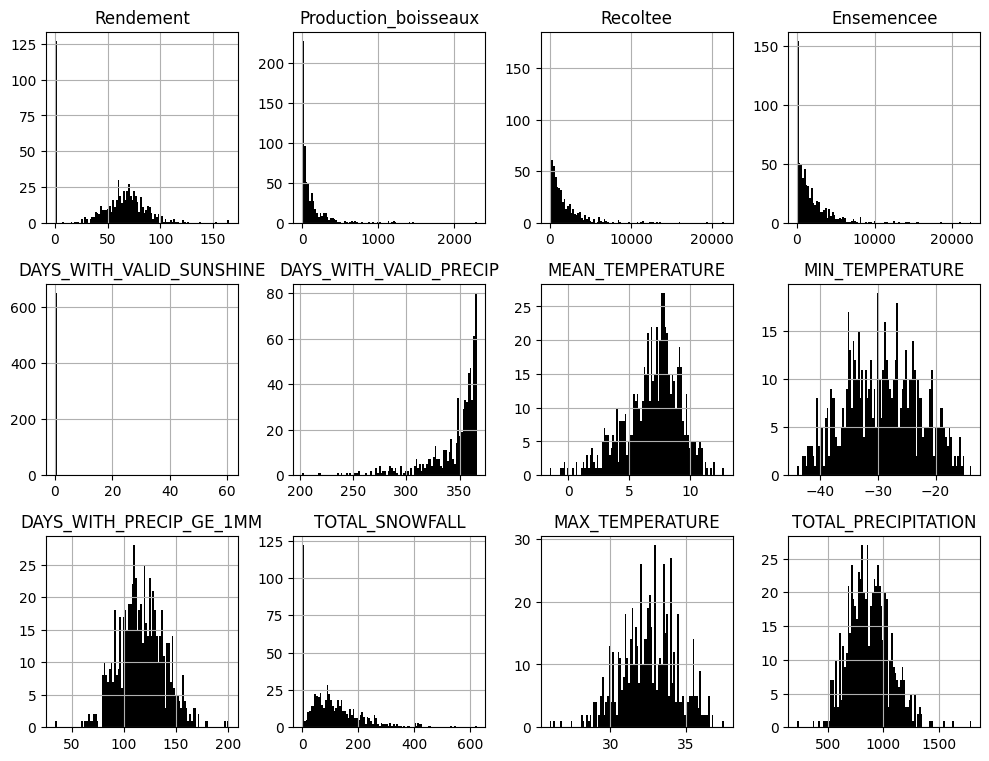

In [3]:
nc = 4
nr = math.ceil((len(cols)/nc)+1)
i = 1

fig = plt.figure(figsize=(10,10))

for col in cols : 
    plt.subplot(nr,nc,i)
    tmp = df.loc[pd.notnull(df.loc[:,col]), col]
    
    try :     
        tmp.hist(bins=100,color='black')
    except : 
        tmp.value_counts().plot(kind='bar', color='black')
    plt.title(col)
    i += 1
        
plt.tight_layout()
plt.show()

/var/folders/jc/f6v43psn1vs2wsxdh3svtxfh0000gn/T/ipykernel_33418/573263541.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = df.groupby('Annee').median().reset_index()


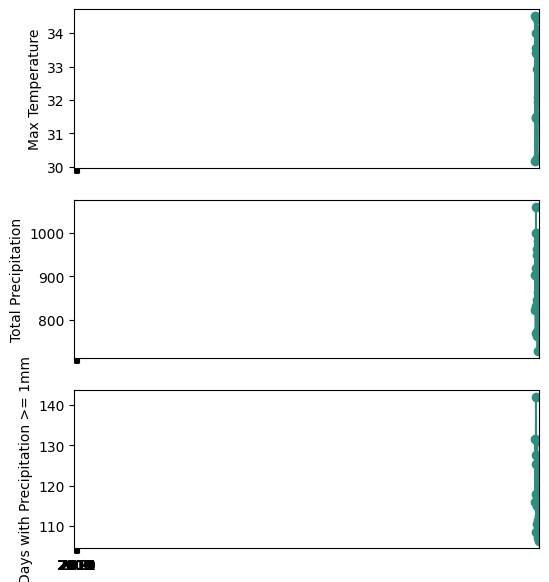

In [13]:
g = df.groupby('Annee').median().reset_index()
g.Annee = g.Annee.astype(int)
fig, ax = plt.subplots(3,1, figsize=(6,7), sharex=True)
ax[0].plot(g.Annee, g.MAX_TEMPERATURE, marker='o', c=colors[2], label='Max Temperature')
ax[0].set_ylabel('Max Temperature', fontsize=10)
ax[1].plot(g.Annee, g.TOTAL_PRECIPITATION, marker='o', c=colors[2], label='Total Precipitation')
ax[1].set_ylabel('Total Precipitation', fontsize=10)
ax[2].plot(g.Annee, g.DAYS_WITH_PRECIP_GE_1MM, marker='o',c=colors[2], label='Days with Precipitation >= 1mm')
ax[2].set_ylabel('Days with Precipitation >= 1mm', fontsize=10)
plt.xticks(range(len(g)), g.Annee)
plt.show()

In [5]:
def plot_var(x_name, y_name):
    x = df.loc[df[y_name].notnull(), x_name]
    y = df.loc[df[y_name].notnull(), y_name]
    fig = plt.figure(figsize=(4,4))
    plt.scatter(x, y, color=colors[0])
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    print(round(np.corrcoef(x, y)[0,1],2))
    plt.plot(x.unique(), p(x.unique()), linestyle='--', color=colors[3])
    plt.title(F'{y_name} en fonction de {x_name}', fontsize=12)
    



-0.08


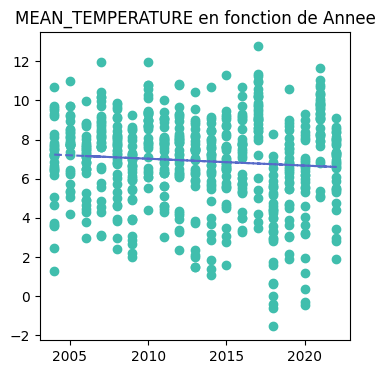

In [6]:
plot_var(x_name='Annee', y_name='MEAN_TEMPERATURE')

-0.14


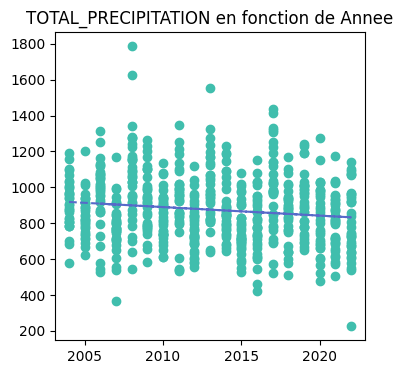

In [7]:
plot_var(x_name='Annee', y_name='TOTAL_PRECIPITATION')

-0.8


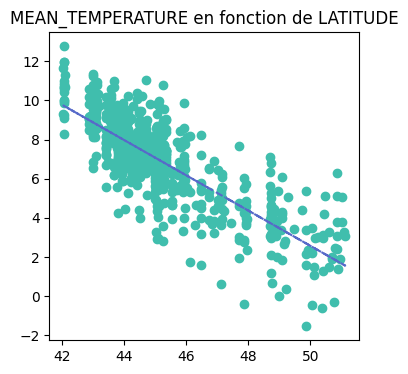

In [8]:
plot_var('LATITUDE', 'MEAN_TEMPERATURE')

-0.08


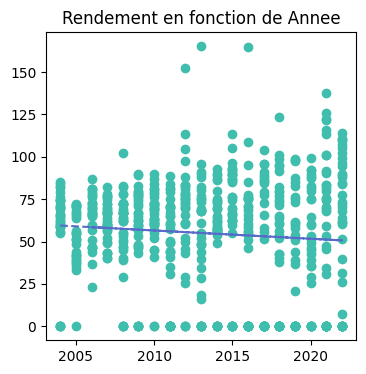

In [9]:
plot_var(x_name='Annee', y_name='Rendement')

-0.16


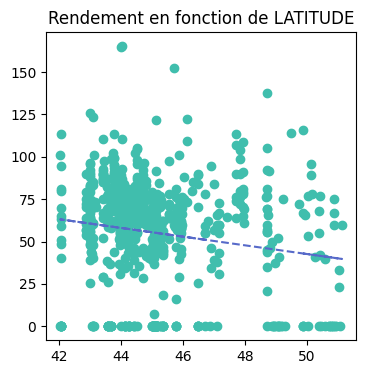

In [10]:
plot_var(x_name='LATITUDE', y_name='Rendement')

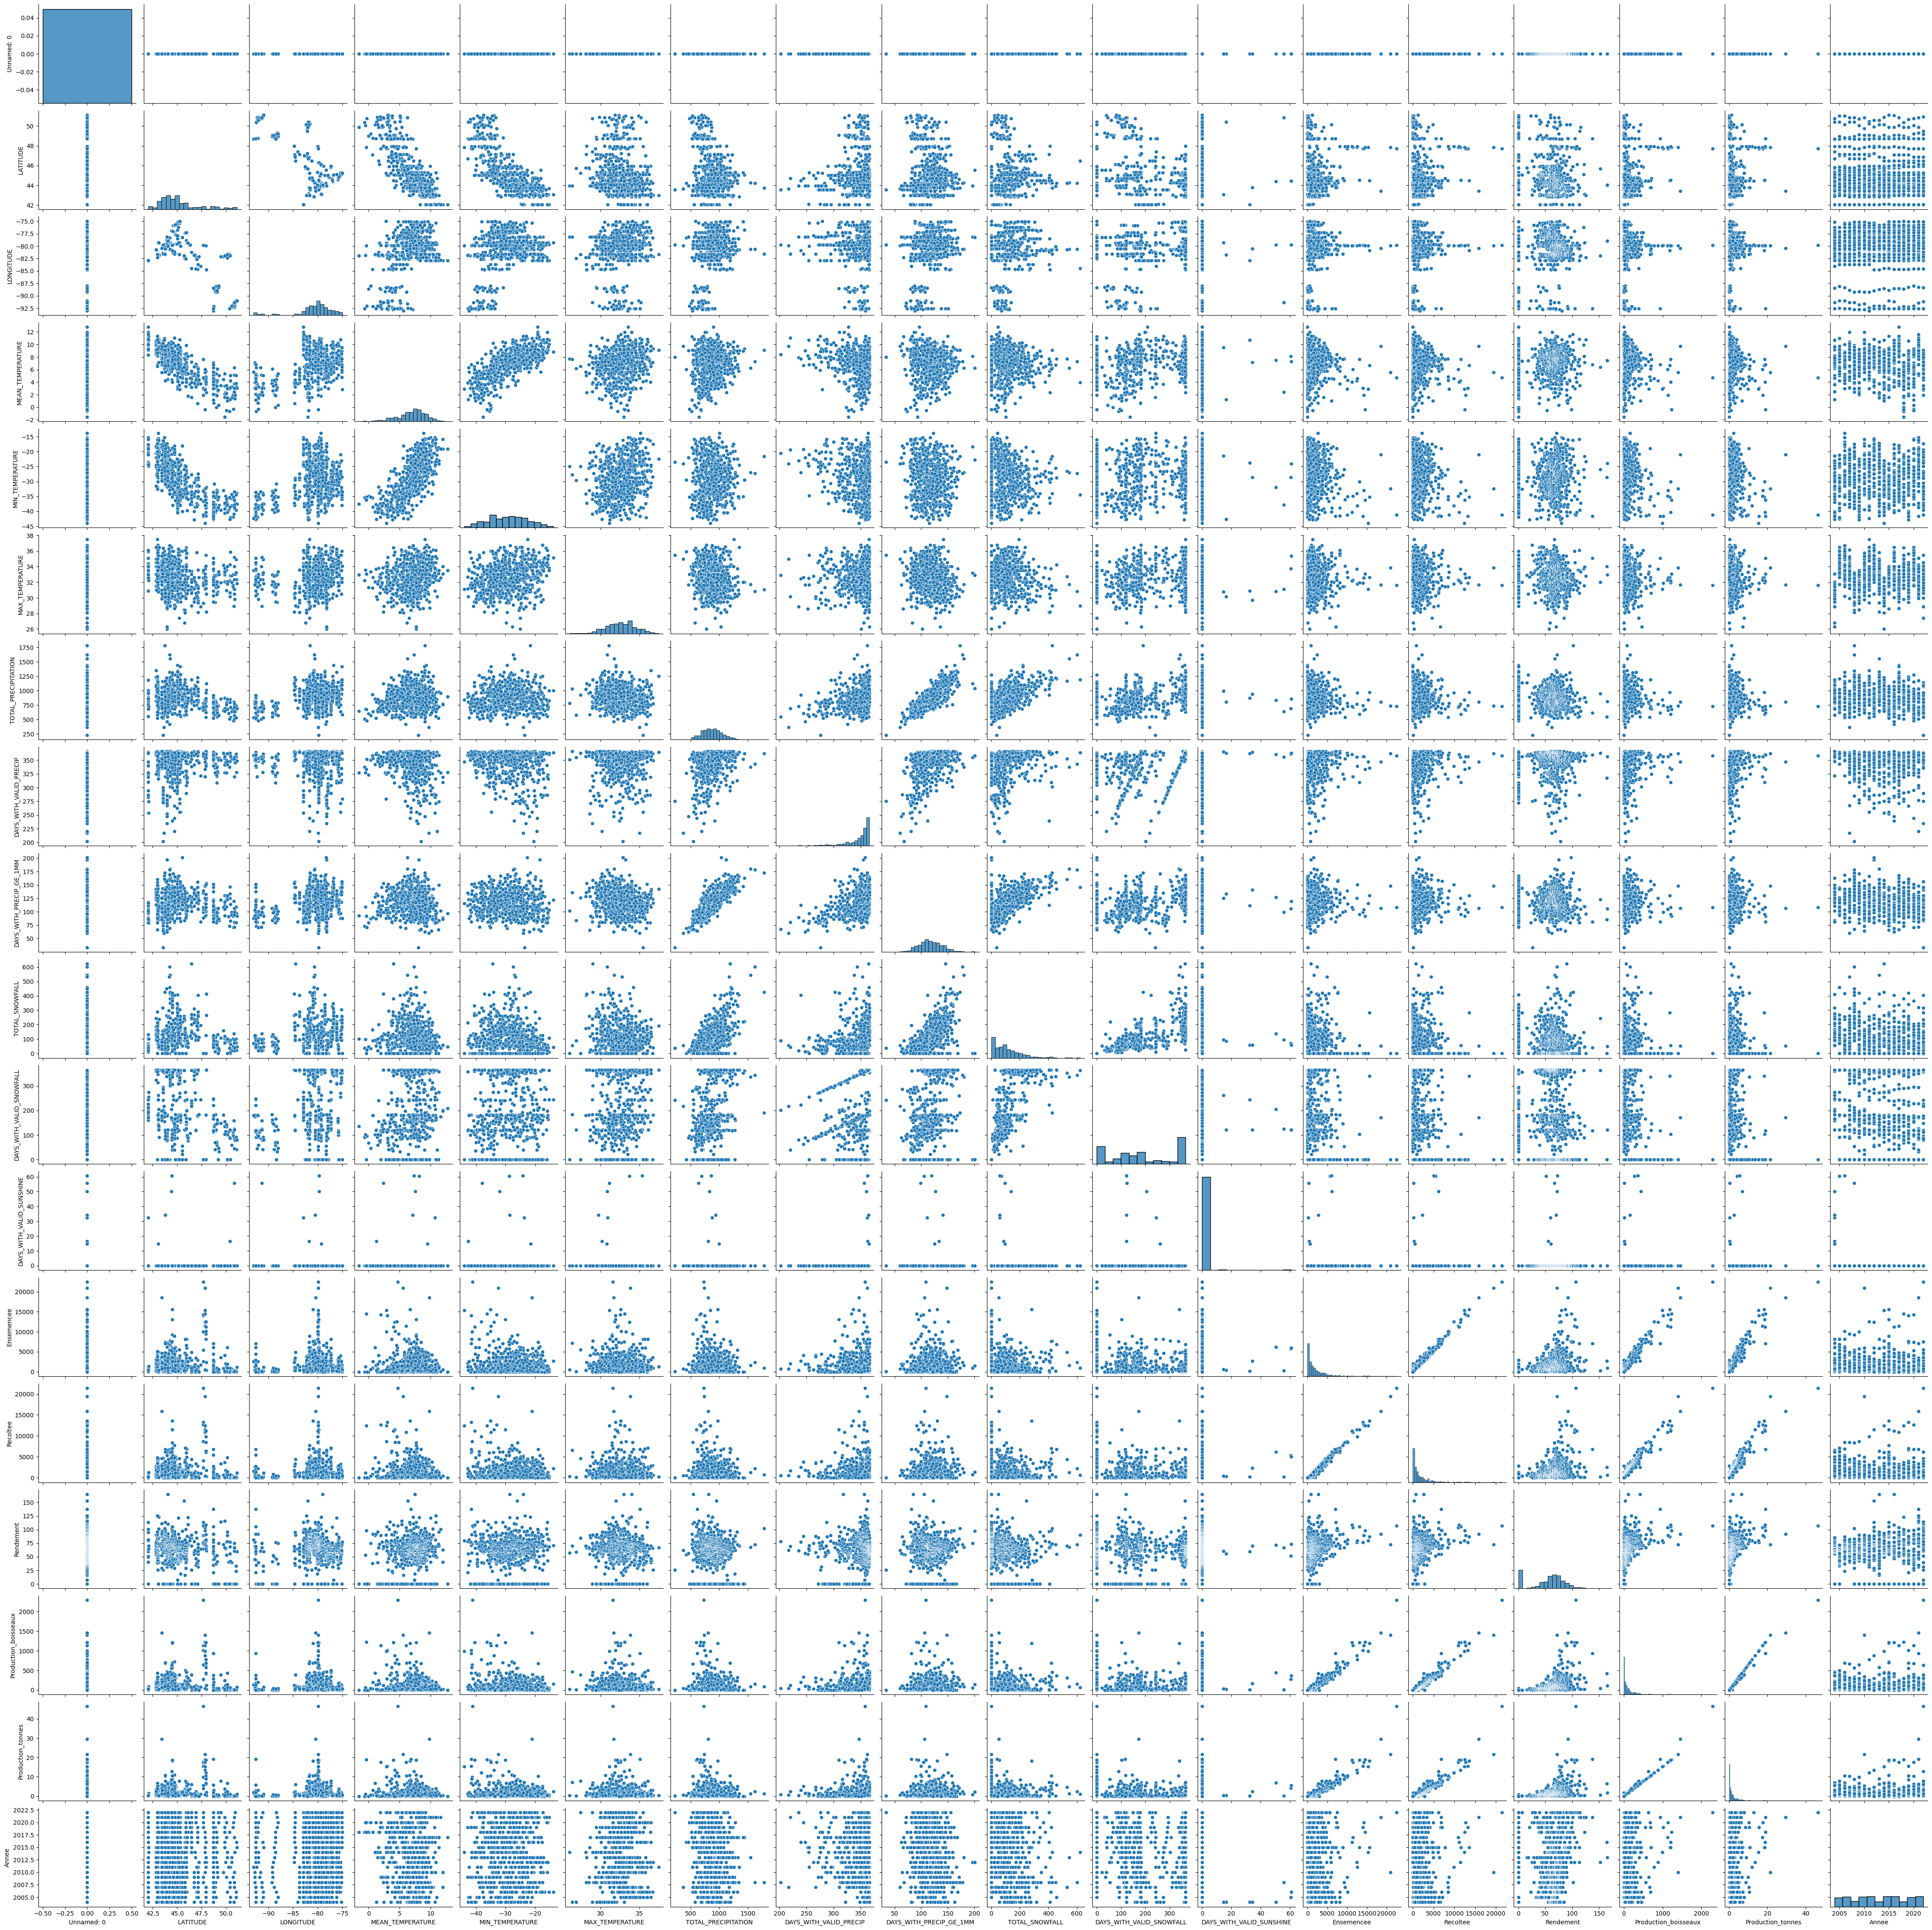

In [11]:
sns.pairplot(df)
plt.show()